<a href="https://colab.research.google.com/github/lewinskie254/eda/blob/main/Anova_On_Steroids.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import statistics as stat
import scipy.stats as stats

In [113]:
#one way anova is categorical to numeric relationships
df = pd.read_csv("http://ishelp.info/data/bikebuyers.csv")

In [3]:
df.head()

,ID,Marital Status,Gender,MaritalStatusNumeric,GenderNumeric,Income,Children,EducationNumeric,CommuteDistanceNumeric,Cars,Age,HomeOwnerNumeric,PurchaseBikeNumeric,Education,Occupation,Home Owner,Commute Distance,Region,Purchased Bike
0,19147,Married,Male,1,0,40000,0,4,1,1,42,0,0,Bachelors,Professional,No,0-1 Miles,North America,No
1,22296,Married,Male,1,0,70000,0,4,1,1,38,0,0,Bachelors,Professional,No,0-1 Miles,North America,No
2,25983,Married,Male,1,0,70000,0,4,1,1,43,0,0,Bachelors,Professional,No,0-1 Miles,North America,No
3,29134,Married,Male,1,0,60000,4,4,5,3,42,0,0,Bachelors,Skilled Manual,No,10+ Miles,North America,No
4,27388,Married,Male,1,0,60000,3,4,2,2,66,0,0,Bachelors,Management,No,1-2 Miles,North America,No


In [6]:
d_types = {col : [df[col].dtype, df[col].nunique()] for col in df.columns}

In [7]:
d_types

{'ID': [dtype('int64'), 1000],
 'Marital Status': [dtype('O'), 2],
 'Gender': [dtype('O'), 2],
 'MaritalStatusNumeric': [dtype('int64'), 2],
 'GenderNumeric': [dtype('int64'), 2],
 'Income': [dtype('int64'), 16],
 'Children': [dtype('int64'), 6],
 'EducationNumeric': [dtype('int64'), 5],
 'CommuteDistanceNumeric': [dtype('int64'), 5],
 'Cars': [dtype('int64'), 5],
 'Age': [dtype('int64'), 53],
 'HomeOwnerNumeric': [dtype('int64'), 2],
 'PurchaseBikeNumeric': [dtype('int64'), 2],
 'Education': [dtype('O'), 5],
 'Occupation': [dtype('O'), 5],
 'Home Owner': [dtype('O'), 2],
 'Commute Distance': [dtype('O'), 5],
 'Region': [dtype('O'), 3],
 'Purchased Bike': [dtype('O'), 2]}

In [12]:
categorical_data_types = [col for col in df.columns if df[col].dtype == "object"]

In [14]:
categorical_details = {col : df[col].unique() for col in categorical_data_types}

In [15]:
categorical_details

{'Marital Status': array(['Married', 'Single'], dtype=object),
 'Gender': array(['Male', 'Female'], dtype=object),
 'Education': array(['Bachelors', 'Graduate Degree', 'High School', 'Partial College',
        'Partial High School'], dtype=object),
 'Occupation': array(['Professional', 'Skilled Manual', 'Management', 'Clerical',
        'Manual'], dtype=object),
 'Home Owner': array(['No', 'Yes'], dtype=object),
 'Commute Distance': array(['0-1 Miles', '10+ Miles', '1-2 Miles', '2-5 Miles', '5-10 Miles'],
       dtype=object),
 'Region': array(['North America', 'Europe', 'Pacific'], dtype=object),
 'Purchased Bike': array(['No', 'Yes'], dtype=object)}

Text(6.042874999999997, 0.5, 'Density')

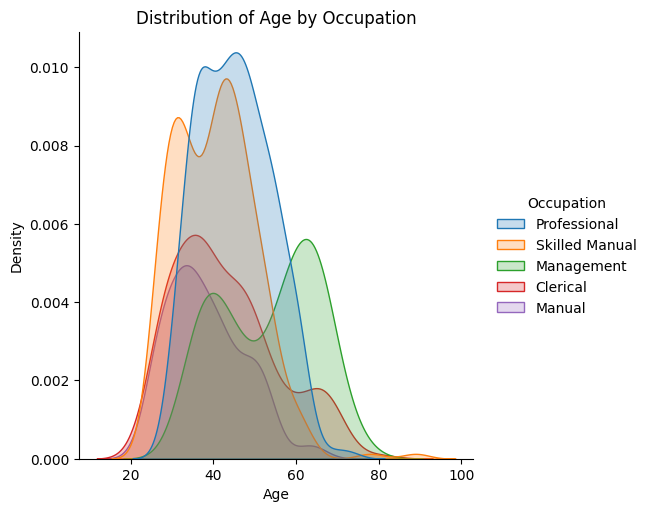

In [19]:
sns.displot(df, x='Age', hue='Occupation', kind='kde', fill=True)
plt.title("Distribution of Age by Occupation")
plt.xlabel("Age")
plt.ylabel("Density")

In [22]:
#number of married people that bought bikes

married = df[df["Marital Status"] == "Married"]
single = df[df["Marital Status"] == "Single"]

In [23]:
married_purchased = married[married["Purchased Bike"] == "Yes"]
single_purchased = single[single["Purchased Bike"] == "Yes"]

married_not_purchased = married[married["Purchased Bike"] == "No"]
single_not_purchased = single[single["Purchased Bike"] == "No"]

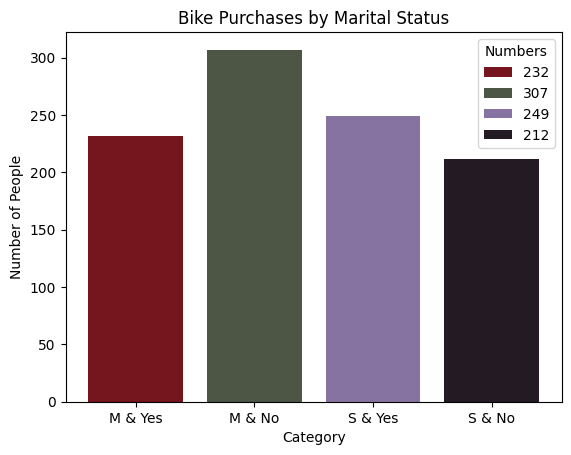

[232, 307, 249, 212]

In [40]:
list_of_married = [married_purchased, married_not_purchased]
list_of_single = [single_purchased, single_not_purchased]

purchased = ["M & Yes", "M & No", "S & Yes", "S & No"]
comprehensive_list = [len(i) for i in list_of_married] + [len(j) for j in list_of_single]
colors = ['#75151E', '#4D5645', "#8673A1", "#231A24"]

# Add labels directly inside plt.bar
plt.bar(purchased, comprehensive_list, color=colors, label=purchased)

# Create the legend
plt.legend(labels=comprehensive_list, title="Numbers")

plt.title("Bike Purchases by Marital Status")
plt.xlabel("Category")
plt.ylabel("Number of People")
plt.show()

comprehensive_list


Text(5.069444444444445, 0.5, 'Density')

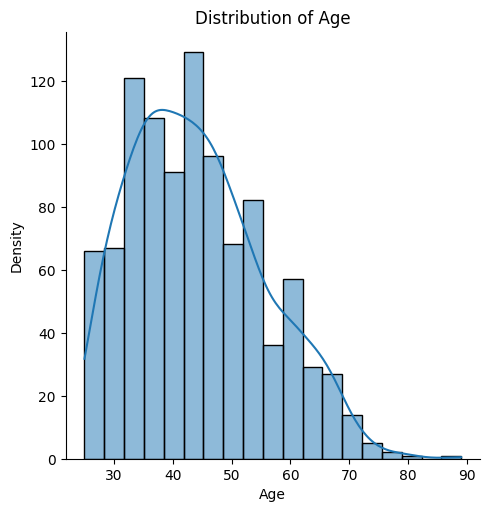

In [49]:
sns.displot(data=df['Age'], kde=True)
plt.title("Distribution of Age")
plt.xlabel("Age")
plt.ylabel("Density")

/tmp/ipython-input-3174322082.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Income'], kde=True)


Text(0, 0.5, 'Density')

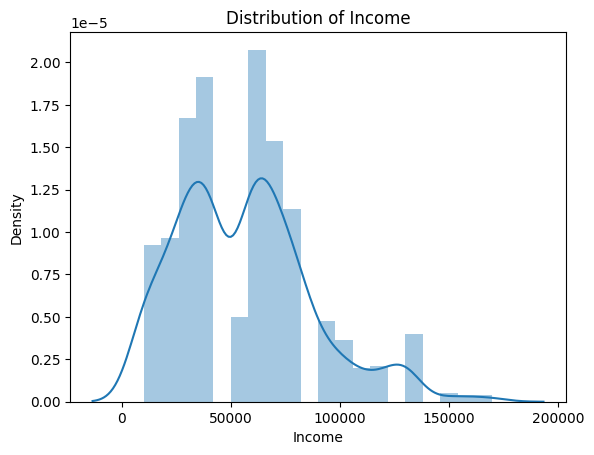

In [50]:
sns.distplot(df['Income'], kde=True)
plt.title("Distribution of Income")
plt.xlabel("Income")
plt.ylabel("Density")

/tmp/ipython-input-1822801661.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Children'], kde=True)


Text(0, 0.5, 'Density')

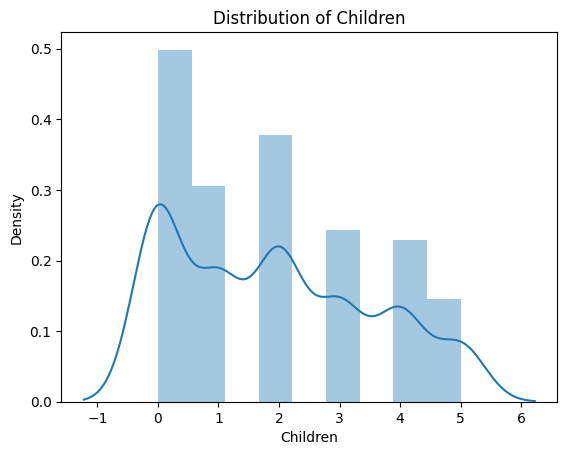

In [51]:
sns.distplot(df['Children'], kde=True)
plt.title("Distribution of Children")
plt.xlabel("Children")
plt.ylabel("Density")

In [55]:
no_children = df[df["Children"] == 0]

Text(0.5, 9.444444444444438, 'Age')

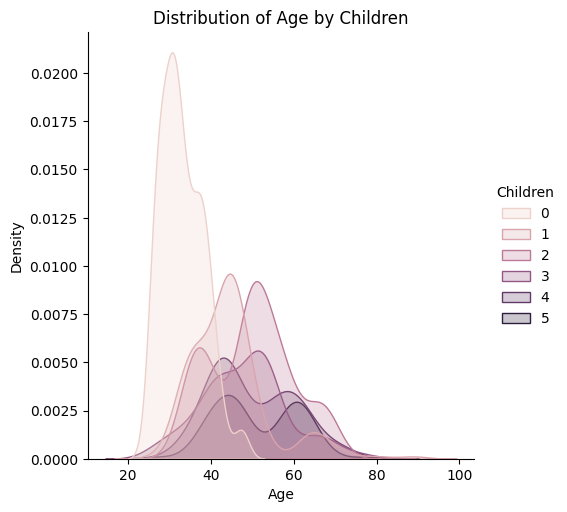

In [58]:
sns.displot(x=df['Age'], hue=df['Children'], kind='kde', fill=True)
plt.title("Distribution of Age by Children")
plt.xlabel("Age")

In [60]:
df.columns

Index(['ID', 'Marital Status', 'Gender', 'MaritalStatusNumeric',
       'GenderNumeric', 'Income', 'Children', 'EducationNumeric',
       'CommuteDistanceNumeric', 'Cars', 'Age', 'HomeOwnerNumeric',
       'PurchaseBikeNumeric', 'Education', 'Occupation', 'Home Owner',
       'Commute Distance', 'Region', 'Purchased Bike'],
      dtype='object')

Text(0.5, 9.444444444444438, 'Age')

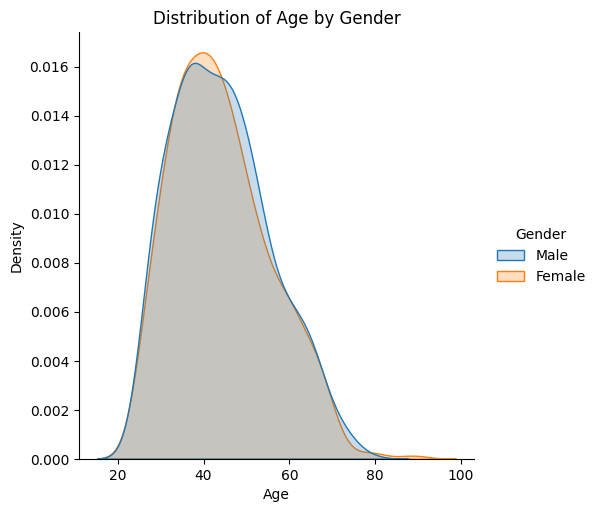

In [61]:
sns.displot(x=df['Age'], hue=df['Gender'], kind='kde', fill=True)
plt.title("Distribution of Age by Gender")
plt.xlabel("Age")

Text(0.5, 9.444444444444438, 'Age')

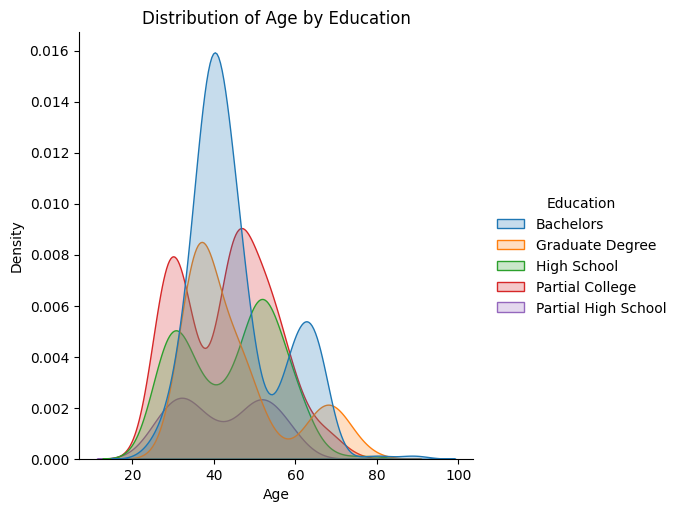

In [62]:
sns.displot(x=df['Age'], hue=df['Education'], kind='kde', fill=True)
plt.title("Distribution of Age by Education")
plt.xlabel("Age")

In [63]:
bike_purchase_by_education = df.groupby("Education")["Purchased Bike"].value_counts()

Text(0.5, 9.444444444444438, 'Age')

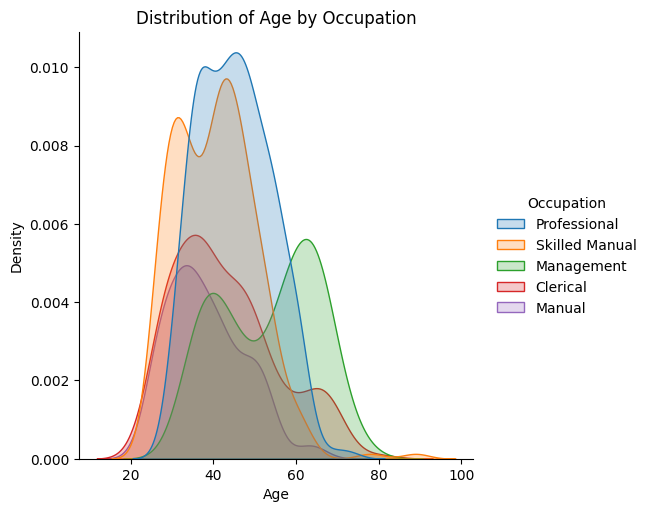

In [68]:
sns.displot(x=df['Age'], hue=df['Occupation'], kind='kde', fill=True)
plt.title("Distribution of Age by Occupation")
plt.xlabel("Age")

In [66]:
df['Occupation'].nunique()

5

In [67]:
set(df['Occupation'])

{'Clerical', 'Management', 'Manual', 'Professional', 'Skilled Manual'}

In [69]:
purchased_bike = df[df["Purchased Bike"] == "Yes"]
did_not_purchase_bike = df[df["Purchased Bike"] == "No"]

Text(0.5, 9.444444444444438, 'Age')

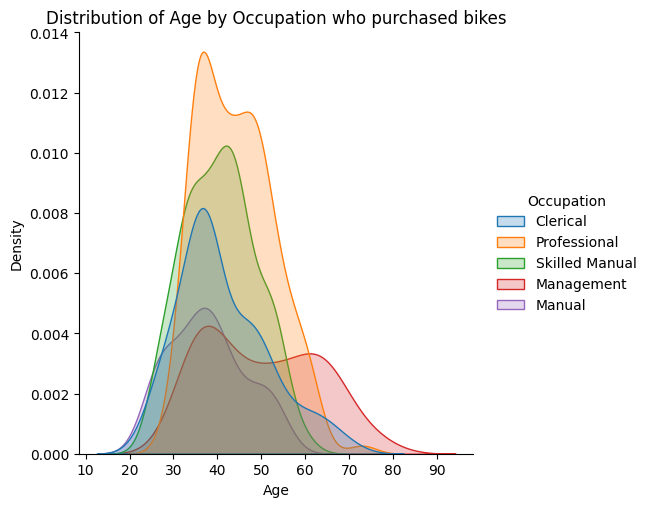

In [70]:
sns.displot(purchased_bike, x=purchased_bike['Age'], hue=purchased_bike['Occupation'], kind='kde', fill=True)
plt.title("Distribution of Age by Occupation who purchased bikes")
plt.xlabel("Age")

Text(0.5, 9.444444444444438, 'Age')

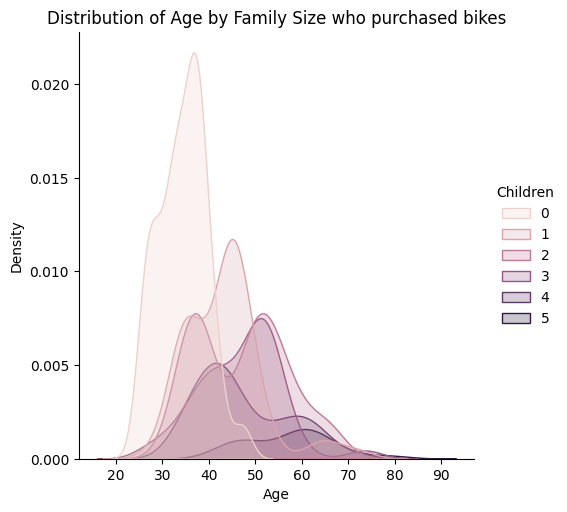

In [71]:
sns.displot(purchased_bike, x=purchased_bike['Age'], hue=purchased_bike['Children'], kind='kde', fill=True)
plt.title("Distribution of Age by Family Size who purchased bikes")
plt.xlabel("Age")

Text(0, 0.5, 'Number of People')

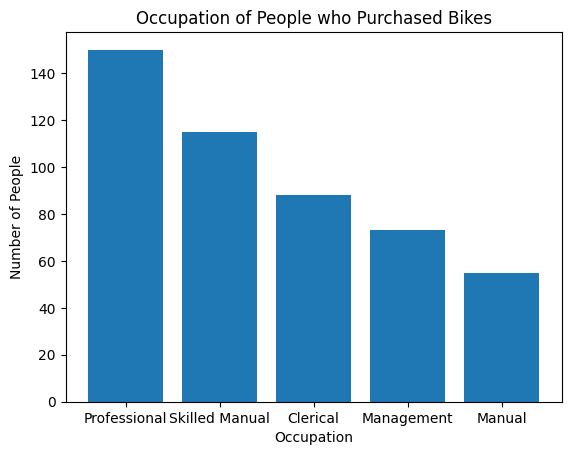

In [73]:
plt.bar(purchased_bike['Occupation'].value_counts().index, purchased_bike['Occupation'].value_counts().values)
plt.title("Occupation of People who Purchased Bikes")
plt.xlabel("Occupation")
plt.ylabel("Number of People")

Text(0.5, 0, 'Occupation')

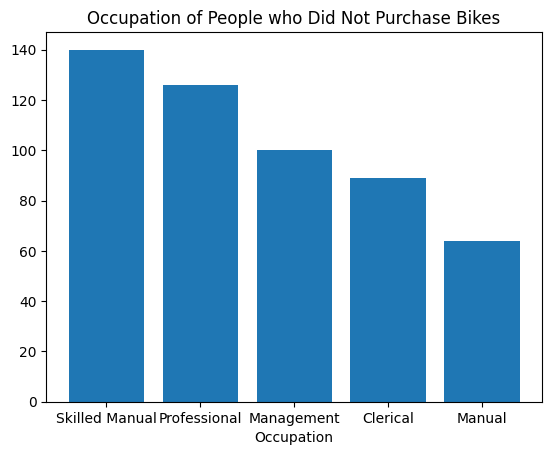

In [74]:
plt.bar(did_not_purchase_bike['Occupation'].value_counts().index, did_not_purchase_bike['Occupation'].value_counts().values)
plt.title("Occupation of People who Did Not Purchase Bikes")
plt.xlabel("Occupation")

In [76]:
distribution_by_occupation = df.groupby("Occupation")["Purchased Bike"].value_counts()
distribution_by_occupation

Occupation      Purchased Bike
Clerical        No                 89
                Yes                88
Management      No                100
                Yes                73
Manual          No                 64
                Yes                55
Professional    Yes               150
                No                126
Skilled Manual  No                140
                Yes               115
Name: count, dtype: int64

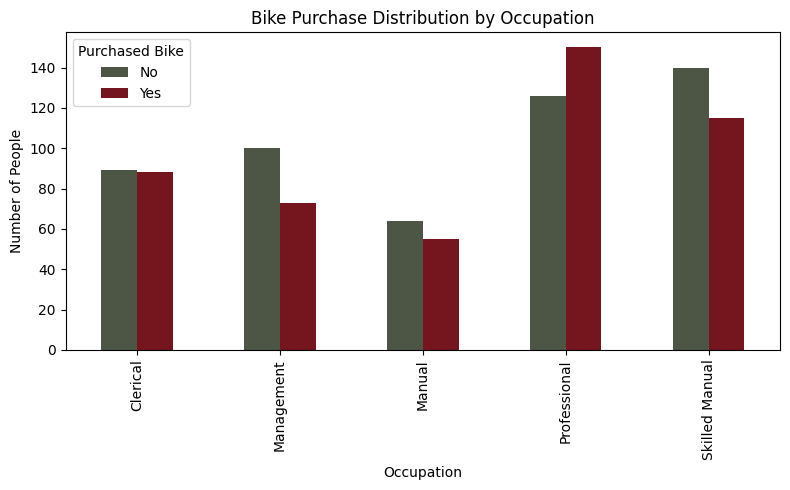

In [77]:
distribution_by_occupation = df.groupby("Occupation")["Purchased Bike"].value_counts().unstack()

distribution_by_occupation.plot(
    kind="bar",
    stacked=False,
    figsize=(8, 5),
    color=["#4D5645", "#75151E"]
)

plt.title("Bike Purchase Distribution by Occupation")
plt.xlabel("Occupation")
plt.ylabel("Number of People")
plt.legend(title="Purchased Bike")
plt.tight_layout()
plt.show()


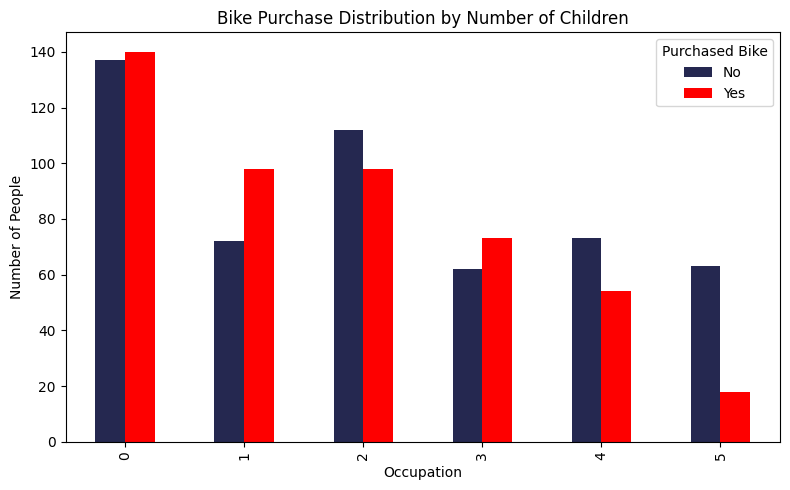

In [84]:
purchased_by_children = df.groupby('Children')["Purchased Bike"].value_counts().unstack()
purchased_by_children.plot(
    kind="bar",
    stacked=False,
    figsize=(8, 5),
    color=["#252850", "#FE0000"]
)

plt.title("Bike Purchase Distribution by Number of Children")
plt.xlabel("Occupation")
plt.ylabel("Number of People")
plt.legend(title="Purchased Bike")
plt.tight_layout()
plt.show()

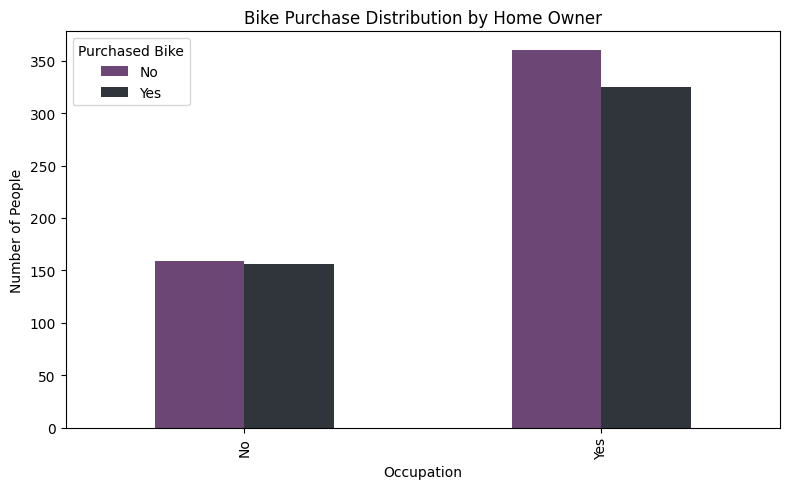

In [88]:
purchased_by_home_owner = df.groupby('Home Owner')["Purchased Bike"].value_counts().unstack()
purchased_by_home_owner.plot(
    kind="bar",
    stacked=False,
    figsize=(8, 5),
    color=["#6C4675", "#2F353B"]
)

plt.title("Bike Purchase Distribution by Home Owner")
plt.xlabel("Occupation")
plt.ylabel("Number of People")
plt.legend(title="Purchased Bike")
plt.tight_layout()
plt.show()

In [100]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [135]:
model = LogisticRegression()
categorical_data_types = categorical_data_types[:-1] + ['Marital Status', 'Gender', "Education", "Occupation", "Home Owner", "Commute Distance", "Region"]
encoded_X = pd.get_dummies(df, columns=categorical_data_types)

y = [0 if i == "No" else 1 for i in df["Purchased Bike"]]
y[:10]
encoded_X.head()

,ID,MaritalStatusNumeric,GenderNumeric,Income,Children,EducationNumeric,CommuteDistanceNumeric,Cars,Age,HomeOwnerNumeric,...,Home Owner_No,Home Owner_Yes,Commute Distance_0-1 Miles,Commute Distance_1-2 Miles,Commute Distance_10+ Miles,Commute Distance_2-5 Miles,Commute Distance_5-10 Miles,Region_Europe,Region_North America,Region_Pacific
0,19147,1,0,40000,0,4,1,1,42,0,...,True,False,True,False,False,False,False,False,True,False
1,22296,1,0,70000,0,4,1,1,38,0,...,True,False,True,False,False,False,False,False,True,False
2,25983,1,0,70000,0,4,1,1,43,0,...,True,False,True,False,False,False,False,False,True,False
3,29134,1,0,60000,4,4,5,3,42,0,...,True,False,False,False,True,False,False,False,True,False
4,27388,1,0,60000,3,4,2,2,66,0,...,True,False,False,True,False,False,False,False,True,False


In [132]:
X = encoded_X.drop("Purchased Bike", axis=1)
y = y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [134]:
X.columns

Index(['ID', 'Marital Status', 'Gender', 'MaritalStatusNumeric',
       'GenderNumeric', 'Income', 'Children', 'EducationNumeric',
       'CommuteDistanceNumeric', 'Cars', 'Age', 'HomeOwnerNumeric',
       'PurchaseBikeNumeric', 'Education_Bachelors',
       'Education_Graduate Degree', 'Education_High School',
       'Education_Partial College', 'Education_Partial High School',
       'Occupation_Clerical', 'Occupation_Management', 'Occupation_Manual',
       'Occupation_Professional', 'Occupation_Skilled Manual', 'Home Owner_No',
       'Home Owner_Yes', 'Commute Distance_0-1 Miles',
       'Commute Distance_1-2 Miles', 'Commute Distance_10+ Miles',
       'Commute Distance_2-5 Miles', 'Commute Distance_5-10 Miles',
       'Region_Europe', 'Region_North America', 'Region_Pacific'],
      dtype='object')

In [142]:
X_train = pd.get_dummies(X_train, drop_first=True)
X_test = pd.get_dummies(X_test, drop_first=True)

# Ensure same columns
X_test = X_test.reindex(columns=X_train.columns, fill_value=0)

model.fit(X_train, y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [143]:
y_preds = model.predict(X_test)

In [144]:
confusion_matrix(y_test, y_preds)

array([[ 97,   1],
       [  0, 102]])

<Axes: >

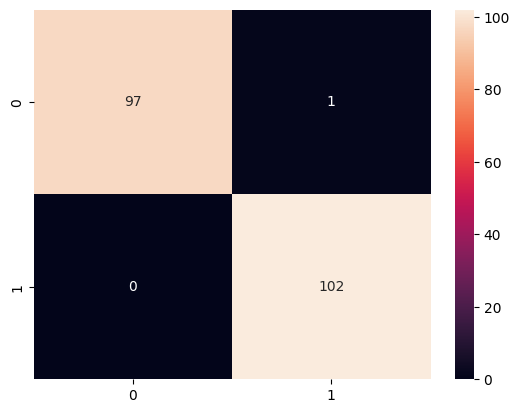

In [145]:
sns.heatmap(confusion_matrix(y_test, y_preds), annot=True, fmt="d")

In [146]:
accuracy_score(y_test, y_preds)

0.995

In [147]:
len(df)

1000

In [148]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import pandas as pd

# One-hot encode categorical features
encoded_df = pd.get_dummies(df, columns=['Marital Status', 'Gender', 'Education', 'Occupation', 'Home Owner', 'Commute Distance', 'Region'], drop_first=True)

X = encoded_df.drop("Purchased Bike", axis=1)
y = [0 if i == "No" else 1 for i in df["Purchased Bike"]]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

y_preds = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_preds))
print(confusion_matrix(y_test, y_preds))
print(classification_report(y_test, y_preds))


Accuracy: 1.0
[[ 98   0]
 [  0 102]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        98
           1       1.00      1.00      1.00       102

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [149]:
[col for col in encoded_df.columns if "Purchased" in col]

['Purchased Bike']

In [159]:
# List all categorical columns EXCEPT the target
categorical_data_types = [
    'Marital Status', 'Gender', 'Education',
    'Occupation', 'Home Owner', 'Commute Distance', 'Region'
]

# Encode only those
encoded_df = pd.get_dummies(df, columns=categorical_data_types, drop_first=True)

# Now safely separate features and target
X = encoded_df.drop("Purchased Bike", axis=1)
y = df["Purchased Bike"].map({"No": 0, "Yes": 1})


encoded_df.columns

Index(['ID', 'MaritalStatusNumeric', 'GenderNumeric', 'Income', 'Children',
       'EducationNumeric', 'CommuteDistanceNumeric', 'Cars', 'Age',
       'HomeOwnerNumeric', 'PurchaseBikeNumeric', 'Purchased Bike',
       'Marital Status_Single', 'Gender_Male', 'Education_Graduate Degree',
       'Education_High School', 'Education_Partial College',
       'Education_Partial High School', 'Occupation_Management',
       'Occupation_Manual', 'Occupation_Professional',
       'Occupation_Skilled Manual', 'Home Owner_Yes',
       'Commute Distance_1-2 Miles', 'Commute Distance_10+ Miles',
       'Commute Distance_2-5 Miles', 'Commute Distance_5-10 Miles',
       'Region_North America', 'Region_Pacific'],
      dtype='object')

In [169]:
y[500:510]==[ 0 if i == "No" else 1 for i in df["Purchased Bike"][500:510]]

,Purchased Bike
500,True
501,True
502,True
503,True
504,True
505,True
506,True
507,True
508,True
509,True


In [156]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

y_preds = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_preds))
print(confusion_matrix(y_test, y_preds))
print(classification_report(y_test, y_preds))

Accuracy: 1.0
[[ 98   0]
 [  0 102]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        98
           1       1.00      1.00      1.00       102

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [157]:
X.columns

Index(['ID', 'MaritalStatusNumeric', 'GenderNumeric', 'Income', 'Children',
       'EducationNumeric', 'CommuteDistanceNumeric', 'Cars', 'Age',
       'HomeOwnerNumeric', 'PurchaseBikeNumeric', 'Marital Status_Single',
       'Gender_Male', 'Education_Graduate Degree', 'Education_High School',
       'Education_Partial College', 'Education_Partial High School',
       'Occupation_Management', 'Occupation_Manual', 'Occupation_Professional',
       'Occupation_Skilled Manual', 'Home Owner_Yes',
       'Commute Distance_1-2 Miles', 'Commute Distance_10+ Miles',
       'Commute Distance_2-5 Miles', 'Commute Distance_5-10 Miles',
       'Region_North America', 'Region_Pacific'],
      dtype='object')

In [171]:
len(df[df["Purchased Bike"] == "Yes"]), len(df[df["Purchased Bike"] == "No"])

(481, 519)

In [172]:
# Check correlations with target
encoded_df["Purchased Bike"] = df["Purchased Bike"].map({"No":0, "Yes":1})
encoded_df.corr()["Purchased Bike"].sort_values(ascending=False)


,Purchased Bike
Purchased Bike,1.000000
PurchaseBikeNumeric,1.000000
EducationNumeric,0.140758
Marital Status_Single,0.109448
Region_Pacific,0.104922
Commute Distance_2-5 Miles,0.092769
Occupation_Professional,0.077207
ID,0.056357
Education_Graduate Degree,0.054409
Income,0.042306


In [175]:
X = encoded_df.drop(["Purchased Bike", "PurchaseBikeNumeric"], axis=1)
y = df["Purchased Bike"].map({"No": 0, "Yes": 1})

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

y_preds = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_preds))
print(confusion_matrix(y_test, y_preds))
print(classification_report(y_test, y_preds))

Accuracy: 0.715
[[74 24]
 [33 69]]
              precision    recall  f1-score   support

           0       0.69      0.76      0.72        98
           1       0.74      0.68      0.71       102

    accuracy                           0.71       200
   macro avg       0.72      0.72      0.71       200
weighted avg       0.72      0.71      0.71       200



/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [174]:
X.columns

Index(['ID', 'MaritalStatusNumeric', 'GenderNumeric', 'Income', 'Children',
       'EducationNumeric', 'CommuteDistanceNumeric', 'Cars', 'Age',
       'HomeOwnerNumeric', 'Marital Status_Single', 'Gender_Male',
       'Education_Graduate Degree', 'Education_High School',
       'Education_Partial College', 'Education_Partial High School',
       'Occupation_Management', 'Occupation_Manual', 'Occupation_Professional',
       'Occupation_Skilled Manual', 'Home Owner_Yes',
       'Commute Distance_1-2 Miles', 'Commute Distance_10+ Miles',
       'Commute Distance_2-5 Miles', 'Commute Distance_5-10 Miles',
       'Region_North America', 'Region_Pacific'],
      dtype='object')

In [177]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the model
logreg = LogisticRegression(max_iter=1000, solver='liblinear')  # liblinear supports l1 penalty

# Define hyperparameter grid
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],          # regularization strength
    'penalty': ['l1', 'l2']                # type of regularization
}

# Set up GridSearchCV
grid_search = GridSearchCV(
    estimator=logreg,
    param_grid=param_grid,
    cv=5,                    # 5-fold cross-validation
    scoring='accuracy',
    verbose=1
)

# Fit the grid search
grid_search.fit(X_train, y_train)

# Best parameters and score
print("Best parameters:", grid_search.best_params_)
print("Best cross-validation accuracy:", grid_search.best_score_)

# Evaluate on test set
best_model = grid_search.best_estimator_
y_preds = best_model.predict(X_test)

print("Test Accuracy:", accuracy_score(y_test, y_preds))
print(confusion_matrix(y_test, y_preds))
print(classification_report(y_test, y_preds))


Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best parameters: {'C': 0.01, 'penalty': 'l2'}
Best cross-validation accuracy: 0.63375
Test Accuracy: 0.695
[[78 20]
 [41 61]]
              precision    recall  f1-score   support

           0       0.66      0.80      0.72        98
           1       0.75      0.60      0.67       102

    accuracy                           0.69       200
   macro avg       0.70      0.70      0.69       200
weighted avg       0.71      0.69      0.69       200



In [178]:
#svm on this:

In [179]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a pipeline: scaling + SVM
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # scale numeric features
    ('svc', SVC())
])

# Define parameter grid
param_grid = {
    'svc__C': [0.1, 1, 10, 100],
    'svc__kernel': ['linear', 'rbf', 'poly'],
    'svc__gamma': ['scale', 'auto']  # for rbf and poly kernels
}

# Grid search with 5-fold CV
grid_search = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    verbose=1
)

# Fit grid search
grid_search.fit(X_train, y_train)

# Best model and parameters
print("Best parameters:", grid_search.best_params_)
print("Best CV accuracy:", grid_search.best_score_)

# Evaluate on test set
best_model = grid_search.best_estimator_
y_preds = best_model.predict(X_test)

print("Test Accuracy:", accuracy_score(y_test, y_preds))
print(confusion_matrix(y_test, y_preds))
print(classification_report(y_test, y_preds))


Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best parameters: {'svc__C': 100, 'svc__gamma': 'scale', 'svc__kernel': 'rbf'}
Best CV accuracy: 0.6799999999999999
Test Accuracy: 0.71
[[69 29]
 [29 73]]
              precision    recall  f1-score   support

           0       0.70      0.70      0.70        98
           1       0.72      0.72      0.72       102

    accuracy                           0.71       200
   macro avg       0.71      0.71      0.71       200
weighted avg       0.71      0.71      0.71       200



In [181]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define model
xgb_model = XGBClassifier(
    use_label_encoder=False,
    eval_metric='logloss',  # required for newer XGBoost
    verbosity=0,            # 0 = silent
    random_state=42
)

# Define hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.7, 0.9, 1],
    'colsample_bytree': [0.7, 0.9, 1]
}

# Grid search
grid_search = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    verbose=1
)

# Fit grid search
grid_search.fit(X_train, y_train)

# Best parameters
print("Best parameters:", grid_search.best_params_)
print("Best CV accuracy:", grid_search.best_score_)

# Evaluate on test set
best_model = grid_search.best_estimator_
y_preds = best_model.predict(X_test)

print("Test Accuracy:", accuracy_score(y_test, y_preds))
print(confusion_matrix(y_test, y_preds))
print(classification_report(y_test, y_preds))


Fitting 5 folds for each of 243 candidates, totalling 1215 fits
Best parameters: {'colsample_bytree': 0.9, 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 50, 'subsample': 0.9}
Best CV accuracy: 0.7025
Test Accuracy: 0.735
[[75 23]
 [30 72]]
              precision    recall  f1-score   support

           0       0.71      0.77      0.74        98
           1       0.76      0.71      0.73       102

    accuracy                           0.73       200
   macro avg       0.74      0.74      0.73       200
weighted avg       0.74      0.73      0.73       200

